# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

def env_option(agent,port =5005):
    if(agent == "single_agent"):
        # select this option to load version 1 (with a single agent) of the environment
        return UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')
    else:
        # select this option to load version 2 (with 20 agents) of the environment
        return UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

env = env_option("multiple_agent")
#env = env_option("single_agent")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
def get_brain_name(env):
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]
    return brain_name,brain

brain_name,brain = get_brain_name(env)

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
def examine_state_action_space(env,brain_name,brain):
    # reset the environment
    env_info = env.reset(train_mode=True)[brain_name]

    # number of agents
    num_agents = len(env_info.agents)
    print('Number of agents:', num_agents)

    # size of each action
    action_size = brain.vector_action_space_size
    print('Size of each action:', action_size)

    # examine the state space 
    states = env_info.vector_observations
    state_size = states.shape[1]
    print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
    print('The state for the first agent looks like:', states[0])
    
    return num_agents,action_size,state_size
    
num_agents,action_size,state_size = examine_state_action_space(env, brain_name,brain)

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.13199999704957008


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

class Actor_NN(nn.Module):
    
    def __init__(self,input_size, output_size, seed = 0):
        super(Actor_NN,self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc0 = nn.Linear(input_size, 128)
        self.fc1 = nn.Linear(128,128)
        self.fc2 = nn.Linear(128,output_size)
        self.bn1 = nn.BatchNorm1d(128)
        self.reset_parameters()
        
    def reset_parameters(self):
        self.fc0.weight.data.uniform_(*hidden_init(self.fc0))
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(-3e-3, 3e-3)
    
    def forward(self,state):
        if state.dim() == 1:
            state = torch.unsqueeze(state,0)
        a = F.relu(self.fc0(state))
        a = F.relu(self.fc1(a))
        a = self.bn1(a)
        a = F.tanh(self.fc2(a))
        return a
    

class Critic_NN(nn.Module):
    
    def __init__(self,input_size,action_size, seed = 0):
        super(Critic_NN,self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc0 = nn.Linear(input_size, 128)
        self.fc1 = nn.Linear(128 + action_size,128)
        self.fc2 = nn.Linear(128,1)
        self.bn1 = nn.BatchNorm1d(128)
        self.reset_parameters()
        
    def reset_parameters(self):
        self.fc0.weight.data.uniform_(*hidden_init(self.fc0))
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(-3e-3, 3e-3)
    
    def forward(self,state, action):
        if state.dim() == 1:
            state = torch.unsqueeze(state,0)
        a = F.leaky_relu(self.fc0(state))
        a = self.bn1(a)
        a = torch.cat((a, action), dim=1)
        a = F.leaky_relu(self.fc1(a))
        return self.fc2(a)
   

In [7]:
import random
import copy
from collections import namedtuple, deque

import numpy as np
import torch.optim as optim

BUFFER_SIZE = int(1e5)
BATCH_SIZE = 128
GAMMA = 0.99
TAU = 1e-3
LR_ACTOR = 1e-4
LR_CRITIC = 1e-3
WEIGHT_DECAY = 0

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [8]:
class OUNoise():
    
    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * (np.random.rand(*x.shape)-0.5)
        self.state = x + dx
        return self.state

In [9]:
class ReplaceBuffer():
    
    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object."""
        self.action_size = action_size
        self.buffer_size = buffer_size
        self.batch_size = batch_size
        self.memory = deque(maxlen = buffer_size)
        self.experience = namedtuple("Experience", field_names = ['state', "action", "reward", "next_state","done"])
        self.seed = random.seed(seed)
        
    def add(self,state,action,reward,next_state,done):
        e = self.experience(state,action,reward,next_state,done)
        self.memory.append(e)
        
    def sample(self):
        experiences = random.sample(self.memory, k = self.batch_size)
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        return (states, actions, rewards, next_states, dones)
    
    def __len__(self):
        return len(self.memory)

In [10]:
class Agent():
    """Interacts with and learn from evironment"""
    def __init__(self, num_agents, state_size,action_size,random_seed):
        """Initialixe an Agent object"""
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        
        self.actor_local = Actor_NN(state_size, action_size,random_seed).to(device)
        self.actor_target = Actor_NN(state_size, action_size,random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr = LR_ACTOR)

        self.critic_local = Critic_NN(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic_NN(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr = LR_CRITIC,weight_decay=WEIGHT_DECAY)

        self.hard_copy_weights(self.actor_target, self.actor_local)
        self.hard_copy_weights(self.critic_target, self.critic_local)
        
        self.noise = OUNoise((num_agents,action_size), random_seed)
        
        self.memory = ReplaceBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
    
    def hard_copy_weights(self, target, source):
        """ copy weights from source to target network (part of initialization)"""
        for target_param, param in zip(target.parameters(), source.parameters()):
            target_param.data.copy_(param.data)    
    
    def step(self,states,actions,rewards,next_states,dones):
        "Save experience and use random sample from buffer to learn"
        for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
            self.memory.add(state,action,reward,next_state,done)
        if(len(self.memory) > BATCH_SIZE):
            experiences = self.memory.sample()
            self.learn(experiences, GAMMA)
            
    def act(self,states,add_noise=True):
        "Returns actions for given state as per current policy"
        states =  torch.from_numpy(states).float().to(device)
        self.actor_local.eval()
        actions = np.zeros(len(states))
        with torch.no_grad():   
            actions = self.actor_local(states).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            actions += self.noise.sample()
        return np.clip(actions, -1, 1)

        
    def reset(self):
        self.noise.reset()
    
    def learn(self,experiences,gamma):
        """Update policy and value parameters using given batch of experience tuples"""
        states, actions, rewards, next_states, dones = experiences
        
        #--------------CRITIC LEARNING-----------
        actions_next = self.actor_target(next_states)
        Q_target_next = self.critic_target(next_states,actions_next)
        Q_targets = rewards + (gamma * Q_target_next * (1 - dones))
        Q_expected = self.critic_local(states,actions)
        critic_loss = F.mse_loss(Q_expected,Q_targets)
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()
        
        #-------------ACTOR_LEARNING--------------
        actions_pred = self.actor_local(states)
        action_loss = -self.critic_local(states, actions_pred).mean()
        self.actor_optimizer.zero_grad()
        action_loss.backward()
        self.actor_optimizer.step()
        
        #----------SOFT UPDATE-------------
        self.soft_update(self.critic_local,self.critic_target,TAU)
        self.soft_update(self.actor_local,self.actor_target,TAU)
    
    def soft_update(self,local_model,target_model,tau):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

In [12]:
def ddpg(env, brain_name, agent, n_episodes=1000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores_list = []
    ep_30 = 0
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations 
        agent.reset()
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states,actions,rewards,next_states,dones)
            scores += rewards                                 # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
                
        avg_ep_score = float(np.mean(scores))
        scores_deque.append(avg_ep_score)
        scores_list.append(avg_ep_score)
        average_score = np.mean(scores_deque)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score), end="")
        if(average_score >=  30.0):
            ep_30 +=1
            if(ep_30 >=100):
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
                break
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score))
    
    return scores_list



In [13]:
agent = Agent(num_agents,state_size,action_size,1)
scores = ddpg(env,brain_name,agent)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Episode 100	Average Score: 28.16
Episode 200	Average Score: 33.28
Episode 205	Average Score: 33.19

NameError: name 'plt' is not defined

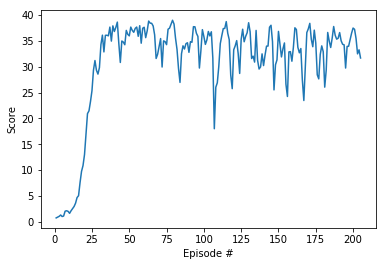

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### How to load weights in pytorch

In [15]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

Closing unity Environment.

In [16]:
env.close()

### Future Work

For the implementation to be more stable Trust Region Policy Optimization (TRPO) and Truncated Natural Policy Gradient (TNPG) will achieve better performance.This well help the learning to not degrade as happens in this implementation after few time steps